https://github.com/GGiecold/pyRMT

In [21]:
import pyRMT
import yfinance as yf
import pandas as pd
import numpy as np
from matplotlib import pyplot
import numpy.matlib as npm

In [5]:
pyRMT

<module 'pyRMT' from '/Users/joseduarte/Desktop/tesis/pyRMT.py'>

Esta es la función que calcula el estimador RIE

Descarga de datos de prueba y calculo de retoros porcentuales

In [6]:
selected_stocks = ['BTC-USD','GC=F', 'MXN=X','^MXX']
raw = yf.download(selected_stocks,"2021-01-01","2021-11-30") 
precios_cierre = pd.DataFrame(raw.Close).dropna()
retpor = np.diff(precios_cierre, axis = 0)/precios_cierre.iloc[:-1,:]
retpor_mat = retpor.to_numpy()

[*********************100%***********************]  4 of 4 completed


<AxesSubplot:xlabel='Date'>

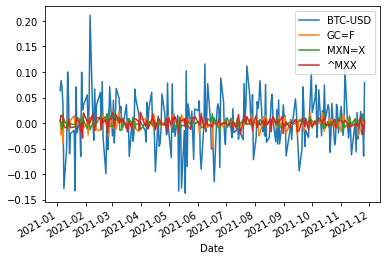

In [7]:
retpor.plot()

Cálculo de la matriz de correlación limpia y la matriz de correlación muestral. Sí existen diferencia entre las dos, a veces es pequeña y a veces es grande.

In [14]:
pyRMT.optimalShrinkage(retpor_mat, method='rie')

array([[ 1.        , -0.06175413, -0.04024409,  0.13738088],
       [-0.06175413,  1.        , -0.1016619 ,  0.03245462],
       [-0.04024409, -0.1016619 ,  1.        ,  0.01720257],
       [ 0.13738088,  0.03245462,  0.01720257,  1.        ]])

In [75]:
np.corrcoef(retpor_mat.T)

array([[ 1.        , -0.06026247, -0.03687219,  0.19756495],
       [-0.06026247,  1.        , -0.16887922,  0.01935667],
       [-0.03687219, -0.16887922,  1.        , -0.01179754],
       [ 0.19756495,  0.01935667, -0.01179754,  1.        ]])

Cálculo ahora la matriz de varianza covarianza limpia y la muestral.

In [76]:
pyRMT.optimalShrinkage(precios_cierre_mat, return_covariance=True)


array([[ 2.32597457e+09,  7.74584822e+07, -8.08322397e+05,
         1.03784787e+09],
       [ 7.74584822e+07,  3.23780722e+06, -3.60669828e+04,
         3.30953966e+05],
       [-8.08322397e+05, -3.60669828e+04,  4.08612424e+02,
         1.25214711e+05],
       [ 1.03784787e+09,  3.30953966e+05,  1.25214711e+05,
         2.43541530e+09]])

In [77]:
np.cov(precios_cierre_mat.T)


array([[ 1.00767739e+08, -2.18482966e+05,  1.96577448e+03,
         4.33561047e+06],
       [-2.18482966e+05,  2.60959652e+03, -9.40099962e+00,
        -2.16104122e+03],
       [ 1.96577448e+03, -9.40099962e+00,  1.47777902e-01,
        -3.59509663e+01],
       [ 4.33561047e+06, -2.16104122e+03, -3.59509663e+01,
         6.24478238e+06]])

Cálculo del estimador RIE pero ahora con regularización mediante la Wishart Inversa

In [27]:
pyRMT.optimalShrinkage(retpor_mat, method='iw')

array([[ 1.        , -0.05795641, -0.03798907,  0.12727164],
       [-0.05795641,  1.        , -0.09285765,  0.03071911],
       [-0.03798907, -0.09285765,  1.        ,  0.01694823],
       [ 0.12727164,  0.03071911,  0.01694823,  1.        ]])

Cálculo del RIE mediante el direct kernel method

In [28]:
pyRMT.optimalShrinkage(retpor_mat, method='kernel')

array([[ 1.        , -0.0496978 , -0.02800314,  0.13976937],
       [-0.0496978 ,  1.        , -0.11223469,  0.01825422],
       [-0.02800314, -0.11223469,  1.        ,  0.00198132],
       [ 0.13976937,  0.01825422,  0.00198132,  1.        ]])